In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import steepest_descent_bcktrck as sdb
from steepest_descent_bcktrck import *
import cgm_pol_rib as cgmpb
from cgm_pol_rib import *
import functions as funcs
from functions import *
from sklearn.model_selection import ParameterGrid
from importlib import reload

In [2]:
reload(funcs)
reload(sdb)
reload(cgmpb)

<module 'cgm_pol_rib' from 'c:\\Users\\bruno\\Documents\\GitHub\\Homework-Numerical-Optimisation-\\Homework Numerical Optimisation\\Unconstrained Optimisation\\cgm_pol_rib.py'>

Evaluate rate of convergence

In [3]:
def rate_of_convergence(x_seq: np.ndarray) ->np.ndarray:
    if (x_seq.shape[0] <= 100):
        N = x_seq.shape[0] - 3
    else:
        N = 100
    p = np.empty(N)
    for k in range(1, N+1):
        if (x_seq[k+2, :] - x_seq[k+1, :]).any() != 0 and (x_seq[k+1, :] - x_seq[k, :]).any() != 0 and (x_seq[k, :] - x_seq[k-1, :]).any() != 0:
            p[k-1] = log(np.linalg.norm(x_seq[k+2, :] - x_seq[k+1, :], 2) / (np.linalg.norm(x_seq[k+1, :] - x_seq[k, :], 2))) / \
                     log(np.linalg.norm(x_seq[k+1, :] - x_seq[k, :], 2) / (np.linalg.norm(x_seq[k, :] - x_seq[k-1, :], 2)))
            # print(f"i = {k-1}: p = {p}")
    return p

Initialisation of the data

In [4]:
x0 = np.array([1.2, 1.2])
x1 = np.array([-1.2, 1])
alpha0 = 1
tolgrad = 1e-12
rho = 0.5
c = 1e-4
kmax = 5000
btmax = 50
fin_diff = False
fd_type = 'centered'

params = {"c": [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
              "rho": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]}

Let's test the Steepest descent and conjugate gradient method with Backtrack tuning the parameters c and rho using the Armijo condition to see what is the result obtained (POINT X0)

Here our idea is quite simple. In order to make a complete comparison between the two methods the best set of paramenters for both methods is evaluated, once this is done a comparison is made with the best result obtained in one of the two methods with one set and the same set is also used for the other method (we will therefore have in all 2 saved evaluations for steepest descent, one with the best set of parameters, and the other with the best set of parameters of the conjugate gradient method, and 2 saved evaluations for the conjugate gradient method) 


In [5]:
#best result for steepest descent method is saved here
sd_best_fk_x0 = np.finfo(float).max
sd_best_param_x0 = 0
sd_best_k_x0 = 0
sd_best_gradfk_norm_x0 = 10
sd_best_xk_x0 = np.empty(2)
sd_best_x_seq_x0 = np.empty(2)
sd_best_f_seq_x0 = np.empty(2)

#best result for conjugate gradient method is saved here
cg_best_fk_x0 = np.finfo(float).max
cg_best_param_x0 = 0
cg_best_k_x0 = 0
cg_best_gradfk_norm_x0 = 10
cg_best_xk_x0 = np.empty(2)
cg_best_x_seq_x0 = np.empty(2)
cg_best_f_seq_x0 = np.empty(2)

#Other result of steepest descent method is saved here
sd_fk_x0 = np.finfo(float).max
sd_param_x0 = 0
sd_k_x0 = 0
sd_xk_x0 = np.empty(2)
# sd_x_seq_x0 = np.empty(2)
# sd_f_seq_x0 = np.empty(2)

#Other result of conjugate gradient method is saved here
cg_f_seq_x0 = np.finfo(float).max
cg_param_x0 = 0
cg_k_x0 = 0
cg_xk_x0 = np.empty(2)
# cg_x_seq_x0 = np.empty(2)
# cg_f_seq_x0 = np.empty(2)

for param in ParameterGrid(params): 
    sd_x_seq, sd_f_seq, sd_gradf_norm_seq, sd_k, sd_bt_seq = steepest_descent_bcktrck(x0, 'Rosenbrock', alpha0, kmax, tolgrad, param["c"], param["rho"], btmax, fin_diff, fd_type)

    cg_x_seq, cg_f_seq, cg_gradf_norm_seq_seq, cg_k, cg_bt_seq = cgm_pol_rib(x0, 'Rosenbrock', alpha0, kmax, tolgrad, param["c"], param["rho"], btmax, fin_diff, fd_type)
    
    if (sd_f_seq[-1] < sd_best_fk_x0): 
        sd_best_param_x0 = param

        sd_best_xk_x0 = sd_x_seq[-1]
        sd_best_k_x0 = sd_k
        sd_best_fk_x0 = sd_f_seq[-1]
        sd_best_gradfk_norm_x0 = sd_gradf_norm_seq[-1]
        sd_best_x_seq_x0 = np.copy(sd_x_seq)
        sd_best_f_seq_x0 = np.copy(sd_f_seq)
        
        cg_xk_x0 = cg_x_seq[-1]
        cg_k_x0 = cg_k
        cg_fk_x0 = cg_f_seq[-1]
            
    if (cg_f_seq[-1] < cg_best_fk_x0): 
        cg_best_param_x0 = param

        cg_best_xk_x0 = cg_x_seq[-1]
        cg_best_k_x0 = cg_k
        cg_best_fk_x0 = cg_f_seq[-1]
        cg_best_gradfk_norm_x0 = cg_gradf_norm_seq_seq[-1]
        cg_best_x_seq_x0 = np.copy(cg_x_seq)
        cg_best_f_seq_x0 = np.copy(cg_f_seq)
        
        sd_xk_x0 = sd_x_seq[-1]
        sd_k_x0 = sd_k
        sd_fk_x0 = sd_f_seq[-1]

In [6]:
sd_x_seq, sd_f_seq, sd_gradf_norm_seq, sd_k, sd_bt_seq = steepest_descent_bcktrck(x0, 'Rosenbrock', alpha0, kmax, tolgrad, 1e-4, 0.7, btmax, fin_diff, fd_type)

In [114]:
print("Best evaluation with steepest descent method:")
print("x0: ", x0[0], x0[1])
print("best set of parameters: ", sd_best_param_x0)
print("xk: ", sd_best_xk_x0[0], sd_best_xk_x0[1])
print("k: ", sd_best_k_x0)
print("fk: ", sd_best_fk_x0) 

print("\nEvaluation of the conjugate gradient method using the best parameters of steepest descent: ")
print("x0: ", x0[0], x0[1])
print("set of parameters: ", sd_best_param_x0)
print("xk: ", cg_xk_x0[0], cg_xk_x0[1])
print("k: ", cg_k_x0)
print("fk: ", cg_fk_x0) 

Best evaluation with steepest descent method:
x0:  1.2 1.2
best set of parameters:  {'c': 1e-06, 'rho': 0.3}
xk:  1.0000001168994828 1.0000002344157561
k:  5000
fk:  1.3703530438166228e-14

Evaluation of the conjugate gradient method using the best parameters of steepest descent: 
x0:  1.2 1.2
set of parameters:  {'c': 1e-06, 'rho': 0.3}
xk:  0.9999999999995883 0.9999999999991743
k:  151
fk:  1.7001633767317057e-25


Best evaluation with steepest descent method:

x0:  [1.2] [1.2]

best set of parameters:  {'c': 0.01, 'rho': 0.7}

xk:  [1.] [1.]

k:  31839

fk:  [4.17569518e-25]


Evaluation of the conjugate gradient method using the best parameters of steepest descent: 

x0:  [1.2] [1.2]

set of parameters:  {'c': 0.01, 'rho': 0.7}

xk:  [1.] [1.]

k:  8589

fk:  [3.1537594e-25]

In [115]:
print("Best evaluation with conjugate gradient method:")
print("x0: ", x0[0], x0[1])
print("best set of parameters: ", cg_best_param_x0)
print("xk: ", cg_best_xk_x0[0], cg_best_xk_x0[1])
print("k: ", cg_best_k_x0)
print("fk: ", cg_best_fk_x0) 

print("\nEvaluation of the steepest descent method using the best parameters of conjugate gradient: ")
print("x0: ", x0[0], x0[1])
print("set of parameters: ", cg_best_param_x0)
print("xk: ", sd_xk_x0[0], sd_xk_x0[1])
print("k: ", sd_k_x0)
print("fk: ", sd_fk_x0) 


Best evaluation with conjugate gradient method:
x0:  1.2 1.2
best set of parameters:  {'c': 0.1, 'rho': 0.5}
xk:  1.000000000000002 1.0000000000000053
k:  76
fk:  1.8148731200740903e-28

Evaluation of the steepest descent method using the best parameters of conjugate gradient: 
x0:  1.2 1.2
set of parameters:  {'c': 0.1, 'rho': 0.5}
xk:  1.0000518836072598 1.0001038051326772
k:  5000
fk:  2.6920327911526105e-09


Best evaluation with conjugate gradient method:

x0:  [1.2] [1.2]

best set of parameters:  {'c': 0.1, 'rho': 0.4}

xk:  [1.] [1.]

k:  330

fk:  [8.72184338e-29]

Evaluation of the steepest descent method using the best parameters of conjugate gradient: 

x0:  [1.2] [1.2]

set of parameters:  {'c': 0.1, 'rho': 0.4}

xk:  [1.] [1.]

k:  27922

fk:  [8.37329555e-25]

In [116]:
if (sd_best_gradfk_norm_x0 <= tolgrad):
    #It make sense to evaluate the rate of convergence if and only if I've reached the solution 
    p = rate_of_convergence(sd_best_x_seq_x0)
    print("Evaluation of rate of convergence for steepest descent method:")
    print(f"p mean = {np.abs(p).mean():.2f}")

Evaluation of rate of convergence for steepest descent method:

p mean = 1.13

In [117]:
if (cg_best_gradfk_norm_x0 <= tolgrad):
    #It make sense to evaluate the rate of convergence if and only if I've reached the solution 
    p = rate_of_convergence(cg_best_x_seq_x0)
    print("Evaluation of rate of convergence for conjugate gradient method:")
    print(f"p mean = {np.abs(p).mean():.2f}")

Evaluation of rate of convergence for conjugate gradient method:
p mean = 9.29


Evaluation of rate of convergence for conjugate gradient method:

p mean = 3.78

Now let's do the same but using another starting point (x1)

In [7]:
#best result for steepest descent method is saved here
sd_best_fk_x1 = np.finfo(float).max
sd_best_param_x1 = 0
sd_best_k_x1 = 0
sd_best_gradfk_norm_x1 = 10
sd_best_xk_x1 = np.empty(2)
sd_best_x_seq_x1 = np.empty(2)
sd_best_f_seq_x1 = np.empty(2)

#best result for conjugate gradient method is saved here
cg_best_fk_x1 = np.finfo(float).max
cg_best_param_x1 = 0
cg_best_k_x1 = 0
cg_best_gradfk_norm_x1 = 10
cg_best_xk_x1 = np.empty(2)
cg_best_x_seq_x1 = np.empty(2)
cg_best_f_seq_x1 = np.empty(2)

#Other result of steepest descent method is saved here
sd_fk_x1 = np.finfo(float).max
sd_param_x1 = 0
sd_k_x1 = 0
sd_xk_x1 = np.empty(2)
# sd_x_seq_x1 = np.empty(2)
# sd_f_seq_x1 = np.empty(2)

#Other result of conjugate gradient method is saved here
cg_fk_x1 = np.finfo(float).max
cg_param_x1 = 0
cg_k_x1 = 0
cg_xk_x1 = np.empty(2)
# cg_x_seq_x1 = np.empty(2)
# cg_f_seq_x1 = np.empty(2)

for param in ParameterGrid(params): 
    sd_x_seq, sd_f_seq, sd_gradf_norm_seq, sd_k, sd_bt_seq = steepest_descent_bcktrck(x1, 'Rosenbrock', alpha0, kmax, tolgrad, param["c"], param["rho"], btmax, fin_diff, fd_type)

    cg_x_seq, cg_f_seq, cg_gradf_norm_seq_seq, cg_k, cg_bt_seq = cgm_pol_rib(x1, 'Rosenbrock', alpha0, kmax, tolgrad, param["c"], param["rho"], btmax, fin_diff, fd_type)
    
    if (sd_f_seq[-1] < sd_best_fk_x1): 
        sd_best_param_x1 = param

        sd_best_xk_x1 = sd_x_seq[-1]
        sd_best_k_x1 = sd_k
        sd_best_fk_x1 = sd_f_seq[-1]
        sd_best_gradfk_norm_x1 = sd_gradf_norm_seq[-1]
        sd_best_x_seq_x1 = np.copy(sd_x_seq)
        sd_best_f_seq_x1 = np.copy(sd_f_seq)
        
        cg_xk_x1 = cg_x_seq[-1]
        cg_k_x1 = cg_k
        cg_fk_x1 = cg_f_seq[-1]
            
    if (cg_f_seq[-1] < cg_best_fk_x1): 
        cg_best_param_x1 = param

        cg_best_xk_x1 = cg_x_seq[-1]
        cg_best_k_x1 = cg_k
        cg_best_fk_x1 = cg_f_seq[-1]
        cg_best_gradfk_norm_x1 = cg_gradf_norm_seq_seq[-1]
        cg_best_x_seq_x1 = np.copy(cg_x_seq)
        cg_best_f_seq_x1 = np.copy(cg_f_seq)
        
        sd_xk_x1 = sd_x_seq[-1]
        sd_k_x1 = sd_k
        sd_fk_x1 = sd_f_seq[-1]

In [119]:
print("Best evaluation with steepest descent method:")
print("x1: ", x1[0], x1[1])
print("best set of parameters: ", sd_best_param_x1)
print("xk: ", sd_best_xk_x1[0], sd_best_xk_x1[1])
print("k: ", sd_best_k_x1)
print("fk: ", sd_best_fk_x1) 

print("\nEvaluation of the conjugate gradient method using the best parameters of steepest descent: ")
print("x1: ", x1[0], x1[1])
print("set of parameters: ", sd_best_param_x1)
print("xk: ", cg_xk_x1[0], cg_xk_x1[1])
print("k: ", cg_k_x1)
print("fk: ", cg_fk_x1) 

Best evaluation with steepest descent method:
x1:  -1.2 1.0
best set of parameters:  0
xk:  1.000000000000002 1.0000000000000053
k:  0
fk:  1

Evaluation of the conjugate gradient method using the best parameters of steepest descent: 
x1:  -1.2 1.0
set of parameters:  0
xk:  0.9999999999995883 0.9999999999991743
k:  0
fk:  1


Best evaluation with steepest descent method:

x1:  [-1.2] [1.]

best set of parameters:  {'c': 1e-06, 'rho': 0.7}

xk:  [1.] [1.]

k:  35285

fk:  [4.17283211e-25]


Evaluation of the conjugate gradient method using the best parameters of steepest descent: 

x1:  [-1.2] [1.]

set of parameters:  {'c': 1e-06, 'rho': 0.7}

xk:  [1.] [1.]

k:  8191

fk:  [2.04761125e-25]

In [120]:
print("Best evaluation with conjugate gradient method:")
print("x1: ", x1[0], x1[1])
print("best set of parameters: ", cg_best_param_x1)
print("xk: ", cg_best_xk_x1[0], cg_best_xk_x1[1])
print("k: ", cg_best_k_x1)
print("fk: ", cg_best_fk_x1) 

print("\nEvaluation of the steepest descent method using the best parameters of conjugate gradient: ")
print("x1: ", x1[0], x1[1])
print("set of parameters: ", cg_best_param_x1)
print("xk: ", sd_xk_x1[0], sd_xk_x1[1])
print("k: ", sd_k_x1)
print("fk: ", sd_fk_x1) 


Best evaluation with conjugate gradient method:
x1:  -1.2 1.0
best set of parameters:  {'c': 0.01, 'rho': 0.5}
xk:  1.0000000000000016 1.000000000000003
k:  3835
fk:  2.4158865222393487e-30

Evaluation of the steepest descent method using the best parameters of conjugate gradient: 
x1:  -1.2 1.0
set of parameters:  {'c': 0.01, 'rho': 0.5}
xk:  0.9991914525639696 0.998375573130094
k:  5000
fk:  6.601261715091401e-07


Best evaluation with conjugate gradient method:

x1:  [-1.2] [1.]

best set of parameters:  {'c': 0.01, 'rho': 0.4}

xk:  [1.] [1.]

k:  318

fk:  [5.77643398e-28]


Evaluation of the steepest descent method using the best parameters of conjugate gradient: 

x1:  [-1.2] [1.]

set of parameters:  {'c': 0.01, 'rho': 0.4}

xk:  [1.] [1.]

k:  28146

fk:  [8.1509053e-25]

In [121]:
if (sd_best_gradfk_norm_x1 <= tolgrad):
    #It make sense to evaluate the rate of convergence if and only if I've reached the solution 
    p = rate_of_convergence(sd_best_x_seq_x1)
    print("Evaluation of rate of convergence for steepest descent method:")
    print(f"p mean = {np.abs(p).mean():.2f}")

Evaluation of rate of convergence for steepest descent method:

p mean = 1.30

In [122]:
if (cg_best_gradfk_norm_x1 <= tolgrad):
    #It make sense to evaluate the rate of convergence if and only if I've reached the solution 
    p = rate_of_convergence(cg_best_x_seq_x1)
    print("Evaluation of rate of convergence for conjugate gradient method:")
    print(f"p mean = {np.abs(p).mean():.2f}")

Evaluation of rate of convergence for conjugate gradient method:
p mean = 2.51


Evaluation of rate of convergence for conjugate gradient method:

p mean = 2.18

Contour graph for the Rosenbrock function

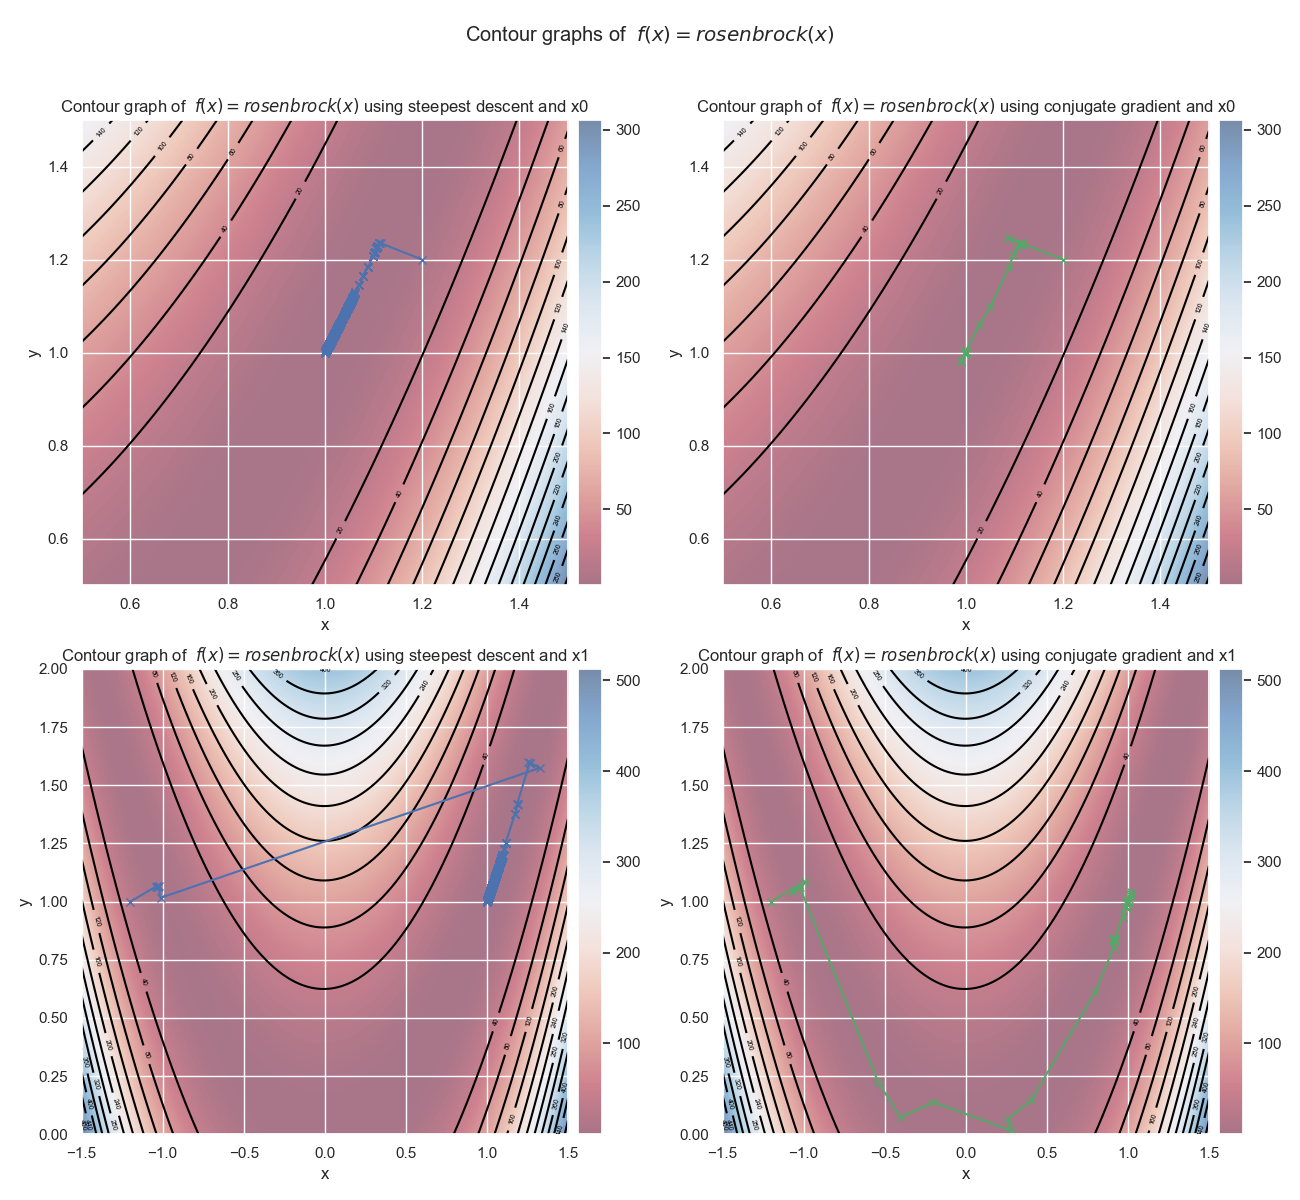

In [8]:
x = np.linspace(0.5, 1.5, 200)
y = np.linspace(0.5, 1.5, 200)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

sns.set()
fig_rb, ax_rb = plt.subplots(2, 2, figsize=(13, 12))

divider = make_axes_locatable(ax_rb[0, 0])
cax = divider.append_axes('right', size='5%', pad=0.1)
contours = ax_rb[0, 0].contour(X, Y, Z, 15, colors='black')
ax_rb[0, 0].clabel(contours, inline=True, fontsize=5)
im = ax_rb[0, 0].imshow(Z, extent=[0.5, 1.5, 0.5, 1.5], origin='lower', cmap='RdBu', alpha=0.5, aspect='auto')
ax_rb[0, 0].plot(sd_best_x_seq_x0[:, 0], sd_best_x_seq_x0[:, 1], '-xb')
ax_rb[0, 0].set_xlabel('x')
ax_rb[0, 0].set_ylabel('y')
ax_rb[0, 0].set_title(r'Contour graph of  $f(x)=rosenbrock(x)$ using steepest descent and x0')
fig_rb.colorbar(im, cax=cax,  orientation='vertical')

divider = make_axes_locatable(ax_rb[0, 1])
cax = divider.append_axes('right', size='5%', pad=0.1)
contours = ax_rb[0, 1].contour(X, Y, Z, 15, colors='black')
ax_rb[0, 1].clabel(contours, inline=True, fontsize=5)
im = ax_rb[0, 1].imshow(Z, extent=[0.5, 1.5, 0.5, 1.5], origin='lower', cmap='RdBu', alpha=0.5, aspect='auto')
ax_rb[0, 1].plot(cg_best_x_seq_x0[:, 0], cg_best_x_seq_x0[:, 1], '-xg')
ax_rb[0, 1].set_xlabel('x')
ax_rb[0, 1].set_ylabel('y')
ax_rb[0, 1].set_title(r'Contour graph of  $f(x)=rosenbrock(x)$ using conjugate gradient and x0')
fig_rb.colorbar(im, cax=cax,  orientation='vertical')

x = np.linspace(-1.5, 1.5, 200)
y = np.linspace(0, 2, 200)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

divider = make_axes_locatable(ax_rb[1, 0])
cax = divider.append_axes('right', size='5%', pad=0.1)
contours = ax_rb[1, 0].contour(X, Y, Z, 15, colors='black')
ax_rb[1, 0].clabel(contours, inline=True, fontsize=5)
im = ax_rb[1, 0].imshow(Z, extent=[-1.5, 1.5, 0, 2], origin='lower', cmap='RdBu', alpha=0.5, aspect='auto')
ax_rb[1, 0].plot(sd_best_x_seq_x1[:, 0], sd_best_x_seq_x1[:, 1], '-xb')
ax_rb[1, 0].set_xlabel('x')
ax_rb[1, 0].set_ylabel('y')
ax_rb[1, 0].set_title(r'Contour graph of  $f(x)=rosenbrock(x)$ using steepest descent and x1')
fig_rb.colorbar(im, cax=cax,  orientation='vertical')

divider = make_axes_locatable(ax_rb[1, 1])
cax = divider.append_axes('right', size='5%', pad=0.1)
contours = ax_rb[1, 1].contour(X, Y, Z, 15, colors='black')
ax_rb[1, 1].clabel(contours, inline=True, fontsize=5)
im = ax_rb[1, 1].imshow(Z, extent=[-1.5, 1.5, 0, 2], origin='lower', cmap='RdBu', alpha=0.5, aspect='auto')
ax_rb[1, 1].plot(cg_best_x_seq_x1[:, 0], cg_best_x_seq_x1[:, 1], '-xg')
ax_rb[1, 1].set_xlabel('x')
ax_rb[1, 1].set_ylabel('y')
ax_rb[1, 1].set_title(r'Contour graph of  $f(x)=rosenbrock(x)$ using conjugate gradient and x1')
fig_rb.colorbar(im, cax=cax,  orientation='vertical')

fig_rb.tight_layout()
fig_rb.suptitle(r'Contour graphs of  $f(x)=rosenbrock(x)$')
fig_rb.subplots_adjust(top=0.9)

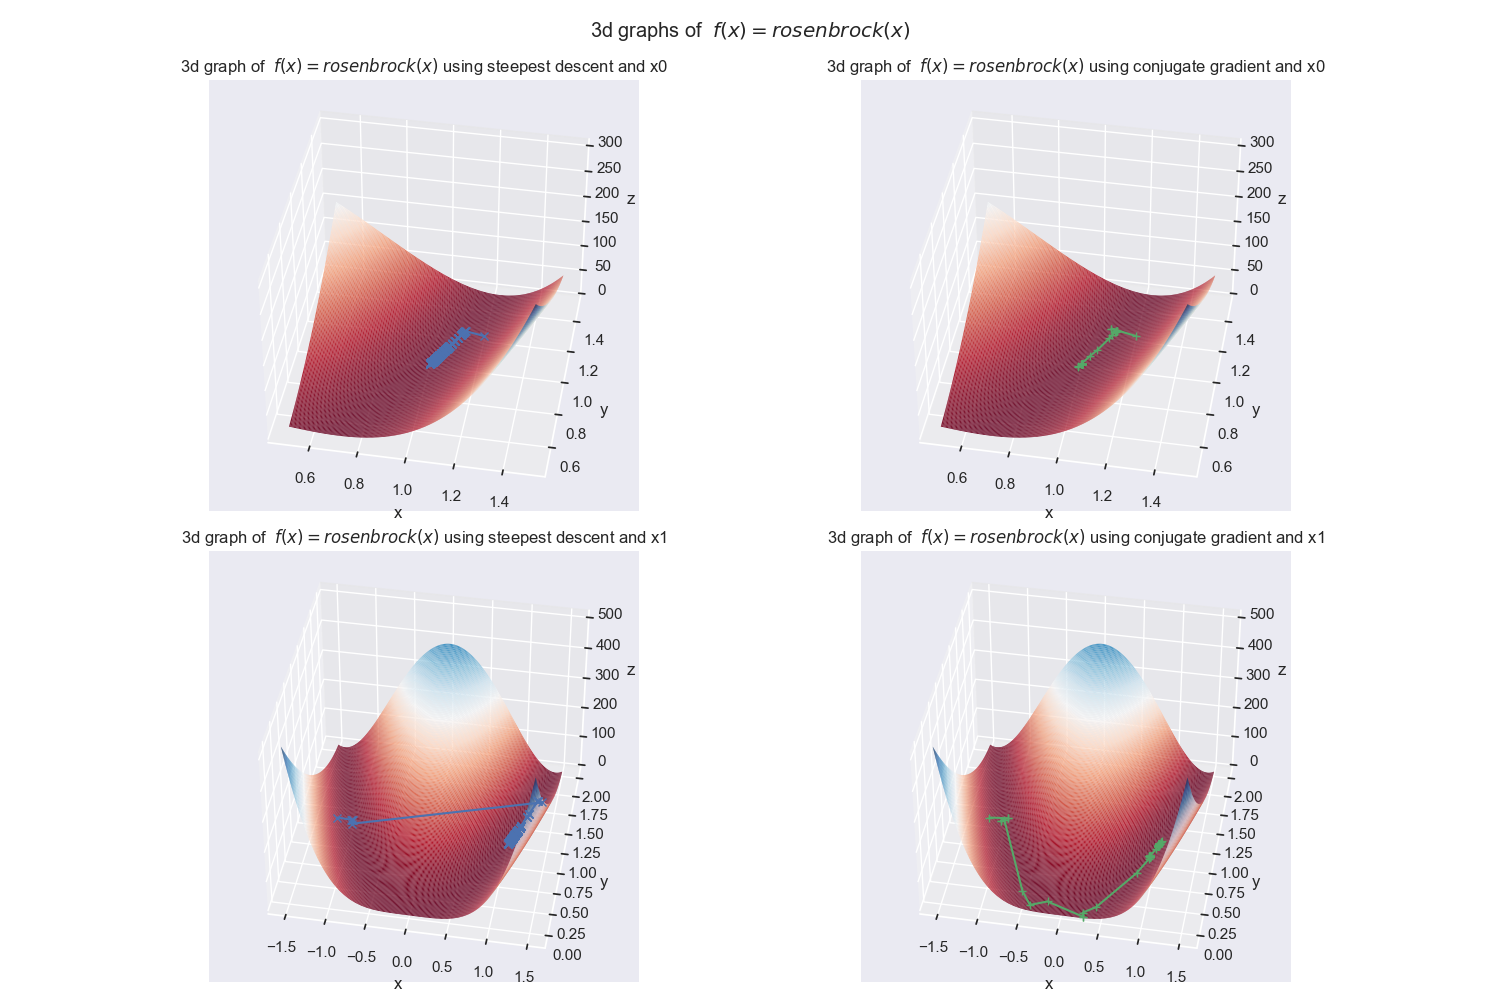

In [51]:
x = np.linspace(0.5, 1.5, 200)
y = np.linspace(0.5, 1.5, 200)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

sns.set()
fig3d = plt.figure(figsize=(15, 10))

ax = fig3d.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='RdBu', edgecolor='none')
ax.plot(sd_best_x_seq_x0[:, 0], sd_best_x_seq_x0[:, 1], sd_best_f_seq_x0, '-xb')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'3d graph of  $f(x)=rosenbrock(x)$ using steepest descent and x0')
ax.view_init(40, -80)

ax = fig3d.add_subplot(2, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='RdBu', edgecolor='none')
ax.plot(cg_best_x_seq_x0[:, 0], cg_best_x_seq_x0[:, 1], cg_best_f_seq_x0, '-+g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'3d graph of  $f(x)=rosenbrock(x)$ using conjugate gradient and x0')
ax.view_init(40, -80)

x = np.linspace(-1.5, 1.5, 200)
y = np.linspace(0, 2, 200)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

ax = fig3d.add_subplot(2, 2, 3, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='RdBu', edgecolor='none')
ax.plot(sd_best_x_seq_x1[:, 0], sd_best_x_seq_x1[:, 1], sd_best_f_seq_x1, '-xb')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'3d graph of  $f(x)=rosenbrock(x)$ using steepest descent and x1')
ax.view_init(40, -80)

ax = fig3d.add_subplot(2, 2, 4, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='RdBu', edgecolor='none')
ax.plot(cg_best_x_seq_x1[:, 0], cg_best_x_seq_x1[:, 1], cg_best_f_seq_x1, '-+g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(r'3d graph of  $f(x)=rosenbrock(x)$ using conjugate gradient and x1')
ax.view_init(40, -80)

fig3d.tight_layout()
fig3d.suptitle(r'3d graphs of  $f(x)=rosenbrock(x)$')
fig3d.subplots_adjust(top=0.92)

Now let's work with the other functions and collect the data. 

1. Extended Powell

In [124]:
kmax = 5000
x0_array = np.random.randint(1, 10, size=(10, 8))

In [125]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    sd_x_seq_ep, sd_f_seq_ep, sd_gradf_norm_seq_ep, sd_k_ep, sd_bt_seq_ep = steepest_descent_bcktrck(point, 'Extended Powell', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of steepest descent method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", sd_k_ep)
    print("fk: ", sd_f_seq_ep[-1]) 
    print("gradfk: ", sd_gradf_norm_seq_ep[-1])
    print("\n")

    kmean += sd_k_ep
    grad_norm_mean += sd_gradf_norm_seq_ep[-1]
    if grad_norm_max < sd_gradf_norm_seq_ep[-1]: 
        grad_norm_max = sd_gradf_norm_seq_ep[-1]
    if grad_norm_min > sd_gradf_norm_seq_ep[-1]: 
        grad_norm_min = sd_gradf_norm_seq_ep[-1]
    fx_mean += sd_f_seq_ep[-1]
    if fx_max < sd_f_seq_ep[-1]: 
        fx_max = sd_f_seq_ep[-1]
    if fx_min > sd_f_seq_ep[-1]: 
        fx_min = sd_f_seq_ep[-1]
    

Result of steepest descent method:
x0:  [1 9 1 4 4 6 3 7]  (length:  8 )
k:  5000
fk:  4.811536980739668e-06
gradfk:  0.0004361012160087513


Result of steepest descent method:
x0:  [7 8 8 9 6 7 7 5]  (length:  8 )
k:  5000
fk:  4.848479699234729e-06
gradfk:  0.0005423747079792438


Result of steepest descent method:
x0:  [6 3 7 7 7 4 9 2]  (length:  8 )
k:  5000
fk:  4.815849291565506e-06
gradfk:  0.000622621957528773


Result of steepest descent method:
x0:  [3 6 9 8 7 9 7 5]  (length:  8 )
k:  5000
fk:  4.836251807485574e-06
gradfk:  0.0006225007269530338


Result of steepest descent method:
x0:  [5 3 1 9 6 4 8 4]  (length:  8 )
k:  5000
fk:  4.846862767342448e-06
gradfk:  0.0004462364430287629




KeyboardInterrupt: 

In [17]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  5000.0


min_of_grad_norm:  0.00034104185306614565
mean_of_grad_norm:  0.0004972385061823958
max_of_grad_norm:  0.0008396623909494702


min_of_fx:  4.759551178805955e-06
mean_of_fx:  4.820834040037819e-06
max_of_fx:  4.8471807702883015e-06


In [18]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    cg_x_seq_ep, cg_f_seq_ep, cg_gradf_norm_seq_ep, cg_k_ep, cg_bt_seq_ep = cgm_pol_rib(point, 'Extended Powell', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of conjugate gradient method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", cg_k_ep)
    print("fk: ", cg_f_seq_ep[-1]) 
    print("gradfk: ", cg_gradf_norm_seq_ep[-1])
    print("\n")
    
    kmean += cg_k_ep
    grad_norm_mean += cg_gradf_norm_seq_ep[-1]
    if grad_norm_max < cg_gradf_norm_seq_ep[-1]: 
        grad_norm_max = cg_gradf_norm_seq_ep[-1]
    if grad_norm_min > cg_gradf_norm_seq_ep[-1]: 
        grad_norm_min = cg_gradf_norm_seq_ep[-1]
    fx_mean += cg_f_seq_ep[-1]
    if fx_max < cg_f_seq_ep[-1]: 
        fx_max = cg_f_seq_ep[-1]
    if fx_min > cg_f_seq_ep[-1]: 
        fx_min = cg_f_seq_ep[-1]
    

Result of conjugate gradient method:
x0:  [9 7 5 9 7 6 8 9]  (length:  8 )
k:  4522
fk:  1.0813611495998627e-18
gradfk:  7.613482293429065e-13


Result of conjugate gradient method:
x0:  [3 4 2 1 3 6 3 1]  (length:  8 )
k:  3109
fk:  3.860301951794614e-18
gradfk:  9.063996683951527e-13


Result of conjugate gradient method:
x0:  [3 3 8 6 6 7 7 2]  (length:  8 )
k:  2782
fk:  6.382872378625729e-18
gradfk:  8.976596696423537e-13


Result of conjugate gradient method:
x0:  [5 2 8 2 3 2 6 7]  (length:  8 )
k:  3849
fk:  3.062871829093788e-18
gradfk:  8.21320769044241e-13


Result of conjugate gradient method:
x0:  [8 2 9 5 2 3 7 4]  (length:  8 )
k:  3962
fk:  3.469606336159058e-18
gradfk:  9.47037110385237e-13


Result of conjugate gradient method:
x0:  [3 5 6 9 5 5 1 9]  (length:  8 )
k:  2863
fk:  4.395292019940678e-18
gradfk:  7.076804009240428e-13


Result of conjugate gradient method:
x0:  [4 2 8 7 5 6 3 1]  (length:  8 )
k:  3010
fk:  1.0463871929887556e-17
gradfk:  8.90988858585278

In [19]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  3498.3


min_of_grad_norm:  7.076804009240428e-13
mean_of_grad_norm:  1.0270159348254004e-12
max_of_grad_norm:  2.588589743850553e-12


min_of_fx:  2.6101647725796357e-19
mean_of_fx:  4.628712185036788e-18
max_of_fx:  1.0463871929887556e-17


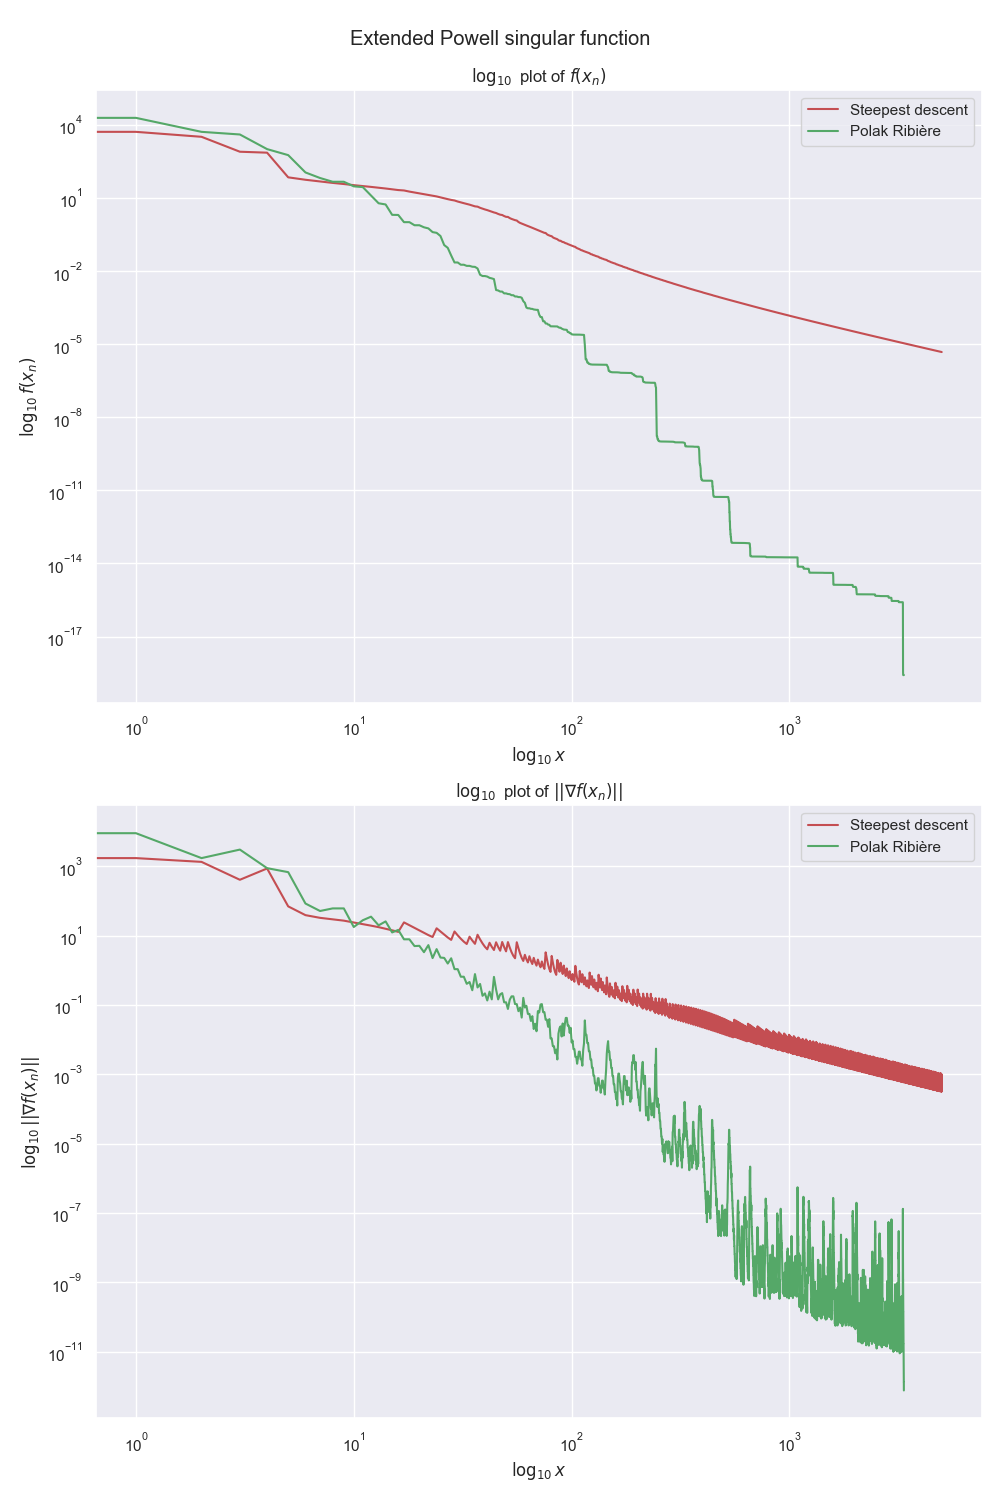

In [59]:
sns.set()
fig_ep, ax_ep = plt.subplots(2, 1, figsize=(10, 15))
ax_ep[0].plot(sd_f_seq_ep, '-r', label='Steepest descent')
ax_ep[0].plot(cg_f_seq_ep, '-g', label='Polak-Ribière')

ax_ep[0].set_xscale('log', base=10)
ax_ep[0].set_yscale('log', base=10)
ax_ep[0].set_xlabel(r'$\log_{10}{x}$')
ax_ep[0].set_ylabel(r'$\log_{10}{f({x_n})}$')
ax_ep[0].set_title(r'$\log_{10}$ plot of $f({x_n})$')

ax_ep[0].legend()

ax_ep[1].plot(sd_gradf_norm_seq_ep, '-r', label='Steepest descent')
ax_ep[1].plot(cg_gradf_norm_seq_ep, '-g', label='Polak-Ribière')

ax_ep[1].set_xscale('log', base=10)
ax_ep[1].set_yscale('log', base=10)
ax_ep[1].set_xlabel(r'$\log_{10}{x}$')
ax_ep[1].set_ylabel(r'$\log_{10}{||\nabla f({x_n})||}$')
ax_ep[1].set_title(r'$\log_{10}$ plot of $||\nabla f({x_n})||$')

ax_ep[1].legend()
fig_ep.tight_layout()
fig_ep.suptitle('Extended Powell singular function')
fig_ep.subplots_adjust(top=0.94)

2. Extended Rosenbrock

In [48]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    sd_x_seq_er, sd_f_seq_er, sd_gradf_norm_seq_er, sd_k_er, sd_bt_seq_er = steepest_descent_bcktrck(point, 'Extended Rosenbrock', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of steepest descent method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", sd_k_er)
    print("fk: ", sd_f_seq_er[-1]) 
    print("gradfk: ", sd_gradf_norm_seq_er[-1])
    print("\n")
    
    kmean += sd_k_er
    grad_norm_mean += sd_gradf_norm_seq_er[-1]
    if grad_norm_max < sd_gradf_norm_seq_er[-1]: 
        grad_norm_max = sd_gradf_norm_seq_er[-1]
    if grad_norm_min > sd_gradf_norm_seq_er[-1]: 
        grad_norm_min = sd_gradf_norm_seq_er[-1]
    fx_mean += sd_f_seq_er[-1]
    if fx_max < sd_f_seq_er[-1]: 
        fx_max = sd_f_seq_er[-1]
    if fx_min > sd_f_seq_er[-1]: 
        fx_min = sd_f_seq_er[-1]
    

Result of steepest descent method:
x0:  [9 7 5 9 7 6 8 9]  (length:  8 )
k:  5000
fk:  13.305322719528064
gradfk:  4.172754887374995


Result of steepest descent method:
x0:  [3 4 2 1 3 6 3 1]  (length:  8 )
k:  5000
fk:  0.31217256628018625
gradfk:  0.26563611543299626


Result of steepest descent method:
x0:  [3 3 8 6 6 7 7 2]  (length:  8 )
k:  5000
fk:  0.6697769528417546
gradfk:  0.5481241082183341


Result of steepest descent method:
x0:  [5 2 8 2 3 2 6 7]  (length:  8 )
k:  5000
fk:  0.5581507418175065
gradfk:  0.4287185003206401


Result of steepest descent method:
x0:  [8 2 9 5 2 3 7 4]  (length:  8 )
k:  5000
fk:  0.1287532306208373
gradfk:  0.30315450617661444


Result of steepest descent method:
x0:  [3 5 6 9 5 5 1 9]  (length:  8 )
k:  5000
fk:  8.858234751936607
gradfk:  2.8028708737504653


Result of steepest descent method:
x0:  [4 2 8 7 5 6 3 1]  (length:  8 )
k:  5000
fk:  2.8604673124033635
gradfk:  1.118386464440305


Result of steepest descent method:
x0:  [9 1 4 2

In [49]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  5000.0


min_of_grad_norm:  0.0038664801741669502
mean_of_grad_norm:  1.1988138791539547
max_of_grad_norm:  4.172754887374995


min_of_fx:  4.3205839543652734e-06
mean_of_fx:  3.430108739636997
max_of_fx:  13.305322719528064


In [123]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    cg_x_seq_er, cg_f_seq_er, cg_gradf_norm_seq_er, cg_k_er, cg_bt_seq_er = cgm_pol_rib(point, 'Extended Rosenbrock', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of conjugate gradient method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", cg_k_er)
    print("fk: ", cg_f_seq_er[-1]) 
    print("gradfk: ", cg_gradf_norm_seq_er[-1])
    print("\n")
    
    kmean += cg_k_er
    grad_norm_mean += cg_gradf_norm_seq_er[-1]
    if grad_norm_max < cg_gradf_norm_seq_er[-1]: 
        grad_norm_max = cg_gradf_norm_seq_er[-1]
    if grad_norm_min > cg_gradf_norm_seq_er[-1]: 
        grad_norm_min = cg_gradf_norm_seq_er[-1]
    fx_mean += cg_f_seq_er[-1]
    if fx_max < cg_f_seq_er[-1]: 
        fx_max = cg_f_seq_er[-1]
    if fx_min > cg_f_seq_er[-1]: 
        fx_min = cg_f_seq_er[-1]
    

NameError: name 'x0_array' is not defined

In [45]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  4089.2


min_of_grad_norm:  6.87134780005037e-14
mean_of_grad_norm:  7.466137148640839e-13
max_of_grad_norm:  2.0959330984264207e-12


min_of_fx:  5.011300530174698e-28
mean_of_fx:  7.56871652578999e-26
max_of_fx:  2.6810714832526413e-25


Text(0.5, 0.98, 'Extended Rosenbrock function')

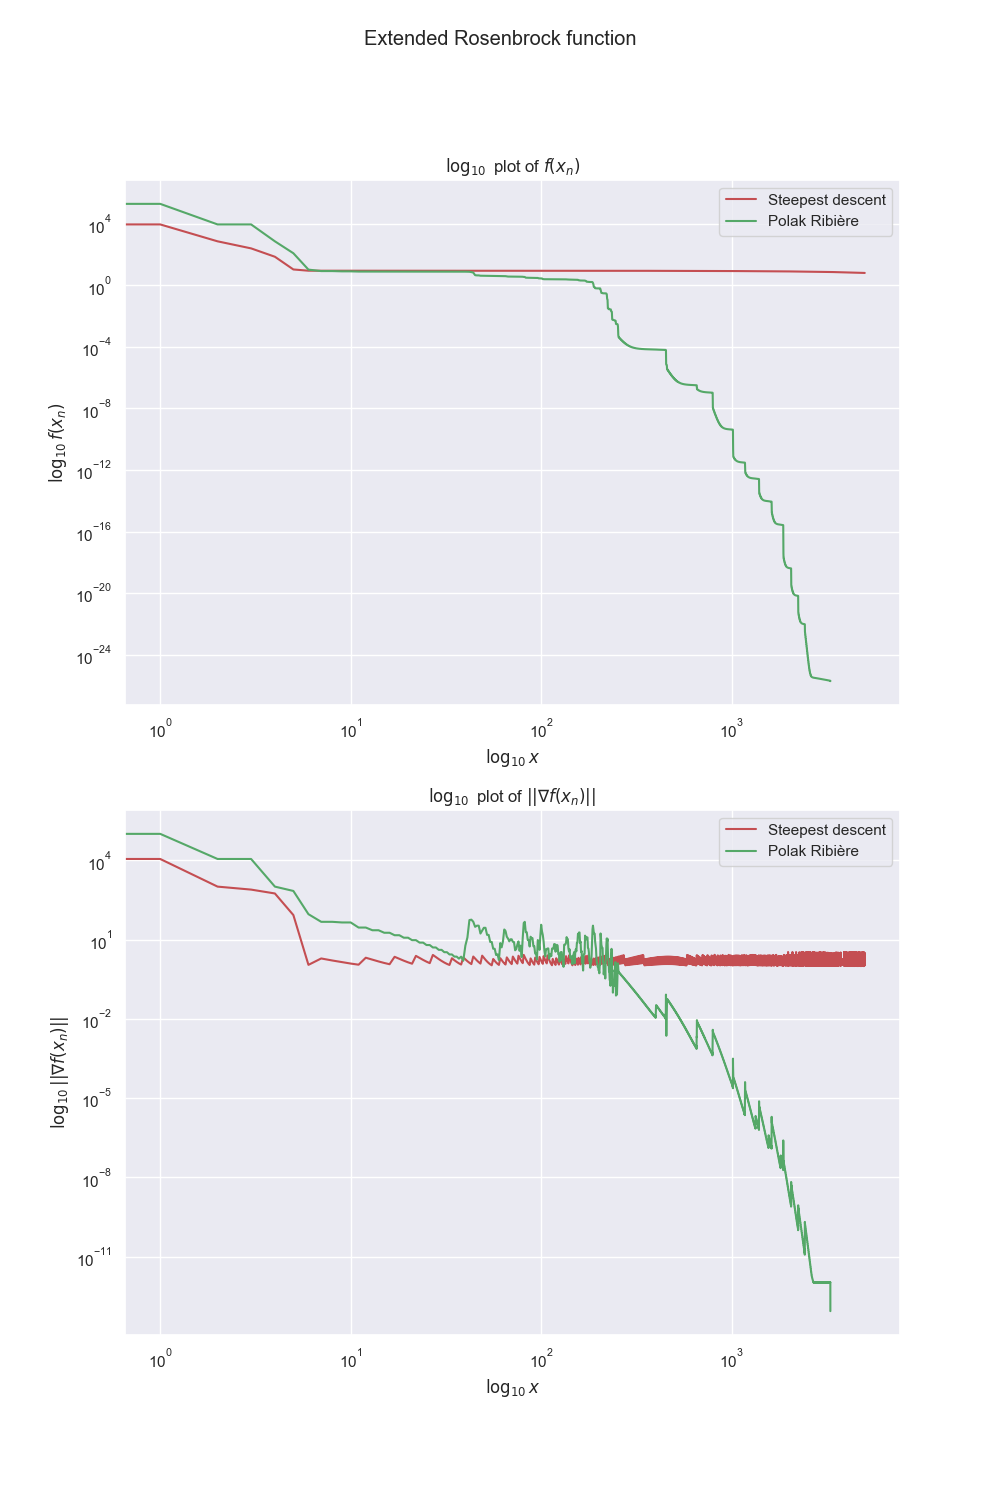

In [58]:
sns.set()
fig_er, ax_er = plt.subplots(2, 1, figsize=(10, 15))
ax_er[0].plot(sd_f_seq_er, '-r', label='Steepest descent')
ax_er[0].plot(cg_f_seq_er, '-g', label='Polak-Ribière')

ax_er[0].set_xscale('log', base=10)
ax_er[0].set_yscale('log', base=10)
ax_er[0].set_xlabel(r'$\log_{10}{x}$')
ax_er[0].set_ylabel(r'$\log_{10}{f({x_n})}$')
ax_er[0].set_title(r'$\log_{10}$ plot of $f({x_n})$')

ax_er[0].legend()

ax_er[1].plot(sd_gradf_norm_seq_er, '-r', label='Steepest descent')
ax_er[1].plot(cg_gradf_norm_seq_er, '-g', label='Polak-Ribière')

ax_er[1].set_xscale('log', base=10)
ax_er[1].set_yscale('log', base=10)
ax_er[1].set_xlabel(r'$\log_{10}{x}$')
ax_er[1].set_ylabel(r'$\log_{10}{||\nabla f({x_n})||}$')
ax_er[1].set_title(r'$\log_{10}$ plot of $||\nabla f({x_n})||$')

ax_er[1].legend()
fig_er.tight_layout()
fig_er.suptitle('Extended Rosenbrock function')
fig_er.subplots_adjust(top=0.94)

3. Banded Trigonometric

In [60]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    sd_x_seq_bt, sd_fk_bt, sd_gradf_norm_seq_bt, sd_k_bt, sd_bt_seq_bt = steepest_descent_bcktrck(point, 'Banded Trigonometric', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of steepest descent method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", sd_k_bt)
    print("fk: ", sd_fk_bt[-1]) 
    print("gradfk: ", sd_gradf_norm_seq_bt[-1])
    print("\n")
    
    kmean += sd_k_bt
    grad_norm_mean += sd_gradf_norm_seq_bt[-1]
    if grad_norm_max < sd_gradf_norm_seq_bt[-1]: 
        grad_norm_max = sd_gradf_norm_seq_bt[-1]
    if grad_norm_min > sd_gradf_norm_seq_bt[-1]: 
        grad_norm_min = sd_gradf_norm_seq_bt[-1]
    fx_mean += sd_fk_bt[-1]
    if fx_max < sd_fk_bt[-1]: 
        fx_max = sd_fk_bt[-1]
    if fx_min > sd_fk_bt[-1]: 
        fx_min = sd_fk_bt[-1]

Result of steepest descent method:
x0:  [9 7 5 9 7 6 8 9]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  2.2595870960379673e-10


Result of steepest descent method:
x0:  [3 4 2 1 3 6 3 1]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  1.492020628795258e-08


Result of steepest descent method:
x0:  [3 3 8 6 6 7 7 2]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  4.0587978488934416e-11


Result of steepest descent method:
x0:  [5 2 8 2 3 2 6 7]  (length:  8 )
k:  5000
fk:  -6.76215816219598
gradfk:  7.866348461583604e-09


Result of steepest descent method:
x0:  [8 2 9 5 2 3 7 4]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  5.14351194626012e-08


Result of steepest descent method:
x0:  [3 5 6 9 5 5 1 9]  (length:  8 )
k:  4106
fk:  -6.7621581621959805
gradfk:  9.989627606971748e-13


Result of steepest descent method:
x0:  [4 2 8 7 5 6 3 1]  (length:  8 )
k:  5000
fk:  -6.76215816219598
gradfk:  1.7879983297245196e-08


Result of steepest des

In [61]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  4910.6


min_of_grad_norm:  9.989627606971748e-13
mean_of_grad_norm:  1.4469297053005906e-08
max_of_grad_norm:  5.14351194626012e-08


min_of_fx:  -6.7621581621959805
mean_of_fx:  -6.7621581621959805
max_of_fx:  -1


In [62]:
kmean = 0 
grad_norm_mean = 0
grad_norm_min = np.finfo(float).max
grad_norm_max = -1
fx_mean = 0
fx_min = np.finfo(float).max
fx_max = -1

for point in x0_array: 
    cg_x_seq_bt, cg_f_seq_bt, cg_gradf_norm_seq_bt, cg_k_bt, cg_bt_seq_bt = cgm_pol_rib(point, 'Banded Trigonometric', alpha0, kmax, tolgrad, c, rho, btmax, fin_diff, fd_type)
    print("Result of steepest descent method:")
    print("x0: ", point, " (length: ", len(point), ")")
    print("k: ", cg_k_bt)
    print("fk: ", cg_f_seq_bt[-1]) 
    print("gradfk: ", cg_gradf_norm_seq_bt[-1])
    print("\n")
    
    kmean += cg_k_bt
    grad_norm_mean += cg_gradf_norm_seq_bt[-1]
    if grad_norm_max < cg_gradf_norm_seq_bt[-1]: 
        grad_norm_max = cg_gradf_norm_seq_bt[-1]
    if grad_norm_min > cg_gradf_norm_seq_bt[-1]: 
        grad_norm_min = cg_gradf_norm_seq_bt[-1]
    fx_mean += cg_f_seq_bt[-1]
    if fx_max < cg_f_seq_bt[-1]: 
        fx_max = cg_f_seq_bt[-1]
    if fx_min > cg_f_seq_bt[-1]: 
        fx_min = cg_f_seq_bt[-1]

Result of steepest descent method:
x0:  [9 7 5 9 7 6 8 9]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  1.382575613525738e-07


Result of steepest descent method:
x0:  [3 4 2 1 3 6 3 1]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  2.0490143041315332e-08


Result of steepest descent method:
x0:  [3 3 8 6 6 7 7 2]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  2.100680635059004e-08


Result of steepest descent method:
x0:  [5 2 8 2 3 2 6 7]  (length:  8 )
k:  5000
fk:  -6.762158162195981
gradfk:  8.549057716609627e-08


Result of steepest descent method:
x0:  [8 2 9 5 2 3 7 4]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  5.72174094198937e-08


Result of steepest descent method:
x0:  [3 5 6 9 5 5 1 9]  (length:  8 )
k:  5000
fk:  -6.7621581621959805
gradfk:  4.0423718976769385e-08


Result of steepest descent method:
x0:  [4 2 8 7 5 6 3 1]  (length:  8 )
k:  5000
fk:  -6.762158162195981
gradfk:  6.247227580993808e-08


Result of steepest de

In [63]:
kmean = kmean / len(x0_array)
grad_norm_mean = grad_norm_mean / len(x0_array)
fx_mean = fx_mean / len(x0_array)

print("mean_of_k: ", kmean)

print("\n")
print("min_of_grad_norm: ", grad_norm_min)
print("mean_of_grad_norm: ", grad_norm_mean)
print("max_of_grad_norm: ", grad_norm_max)

print("\n")
print("min_of_fx: ", fx_min)
print("mean_of_fx: ", fx_mean)
print("max_of_fx: ", fx_max)

mean_of_k:  5000.0


min_of_grad_norm:  2.0490143041315332e-08
mean_of_grad_norm:  5.719924266828129e-08
max_of_grad_norm:  1.382575613525738e-07


min_of_fx:  -6.762158162195981
mean_of_fx:  -6.7621581621959805
max_of_fx:  -1


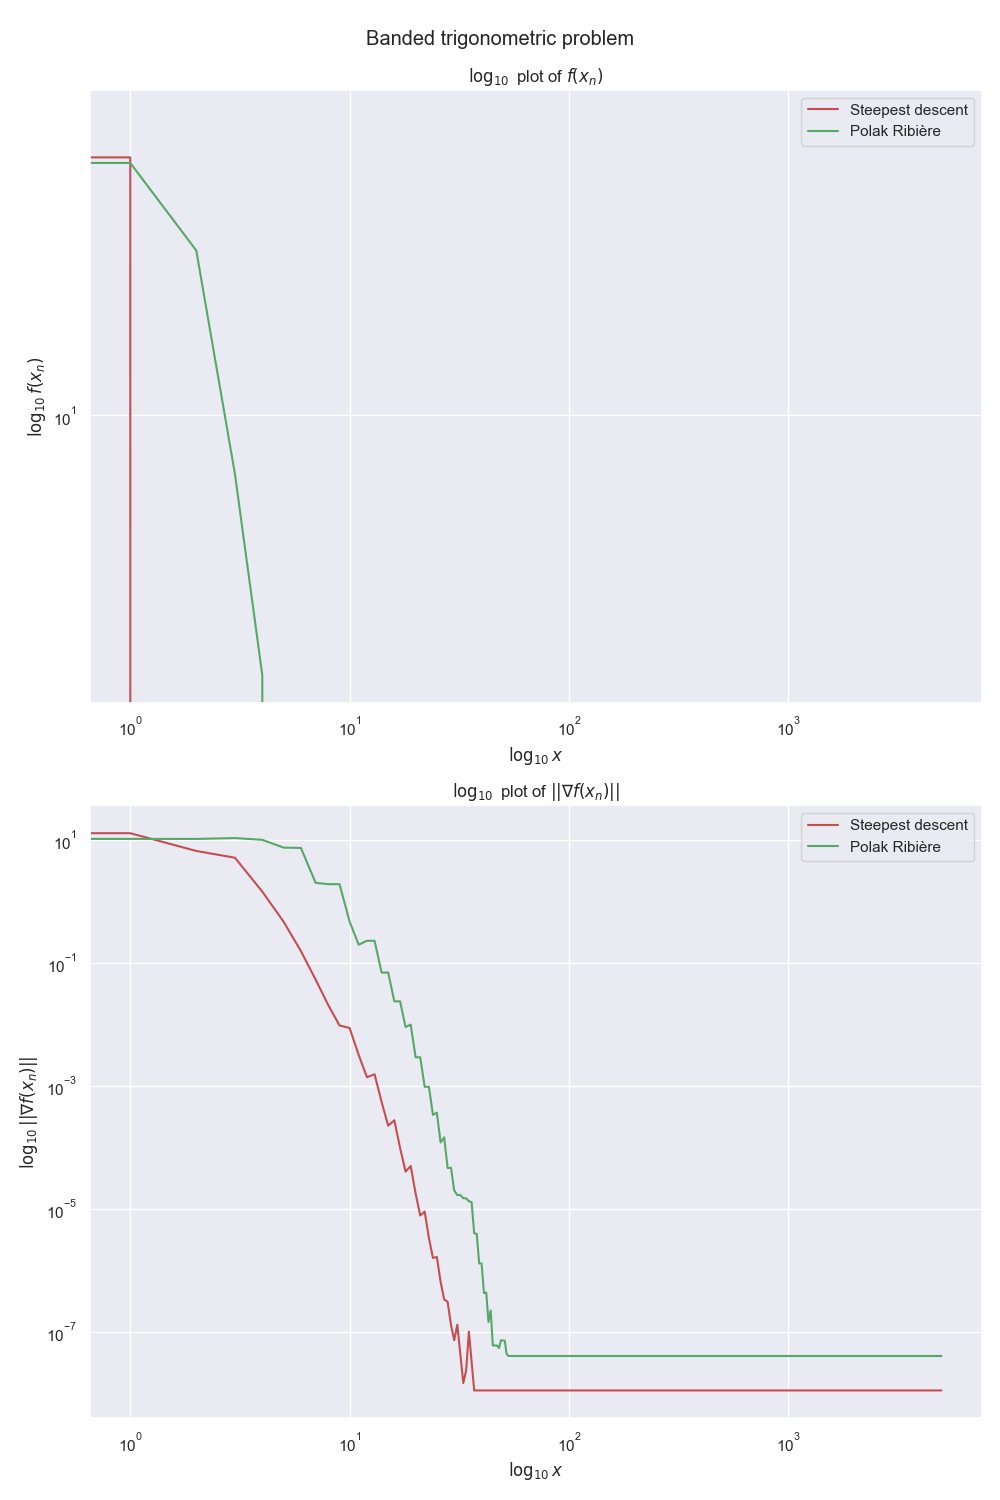

In [64]:
sns.set()
fig_bt, ax_bt = plt.subplots(2, 1, figsize=(10, 15))
ax_bt[0].plot(sd_fk_bt, '-r', label='Steepest descent')
ax_bt[0].plot(cg_f_seq_bt, '-g', label='Polak-Ribière')

ax_bt[0].set_xscale('log', base=10)
ax_bt[0].set_yscale('log', base=10)
ax_bt[0].set_xlabel(r'$\log_{10}{x}$')
ax_bt[0].set_ylabel(r'$\log_{10}{f({x_n})}$')
ax_bt[0].set_title(r'$\log_{10}$ plot of $f({x_n})$')

ax_bt[0].legend()

ax_bt[1].plot(sd_gradf_norm_seq_bt, '-r', label='Steepest descent')
ax_bt[1].plot(cg_gradf_norm_seq_bt, '-g', label='Polak-Ribière')

ax_bt[1].set_xscale('log', base=10)
ax_bt[1].set_yscale('log', base=10)
ax_bt[1].set_xlabel(r'$\log_{10}{x}$')
ax_bt[1].set_ylabel(r'$\log_{10}{||\nabla f({x_n})||}$')
ax_bt[1].set_title(r'$\log_{10}$ plot of $||\nabla f({x_n})||$')

ax_bt[1].legend()
fig_bt.tight_layout()
fig_bt.suptitle('Banded trigonometric problem')
fig_bt.subplots_adjust(top=0.94)